In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import math

%matplotlib inline

import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['prices_2008_2022.csv']))


Saving prices_2008_2022.csv to prices_2008_2022.csv


# New Section

In [ ]:
df

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,0,2008-12-30,1STBSRS,823.00,840.00,819.0,825.0,826.25,825.75,86,4.1475,5000
1,1,2008-12-28,1STBSRS,817.00,829.00,802.0,802.0,825.75,790.00,59,2.7838,3400
2,2,2008-12-24,1STBSRS,789.00,809.75,786.0,790.0,790.00,785.75,74,3.5270,4450
3,3,2008-12-23,1STBSRS,785.00,798.50,785.0,785.0,785.75,782.50,38,2.0541,2600
4,4,2008-12-22,1STBSRS,778.25,794.50,775.5,787.0,782.50,797.75,19,0.7825,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
1791064,112709,2022-01-06,ZEALBANGLA,123.40,123.40,119.0,119.0,119.50,120.40,29,0.1730,1445
1791065,112710,2022-01-05,ZEALBANGLA,118.00,124.90,118.0,124.9,120.40,123.80,38,0.3800,3105
1791066,112711,2022-01-04,ZEALBANGLA,123.80,123.80,120.0,120.2,123.80,122.00,39,0.3640,2954
1791067,112712,2022-01-03,ZEALBANGLA,120.00,128.00,117.6,117.6,122.00,117.00,81,0.8170,6681


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791069 entries, 0 to 1791068
Data columns (total 12 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   date                      object 
 2   trading_code              object 
 3   last_traded_price         float64
 4   high                      float64
 5   low                       float64
 6   opening_price             float64
 7   closing_price             float64
 8   yesterdays_closing_price  float64
 9   trade                     int64  
 10  value_mn                  float64
 11  volume                    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 164.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
count,1.791069e+06,1.791069e+06,1.791069e+06,1.791069e+06,1.791069e+06,1.791069e+06,1.791069e+06,1.791069e+06,1.791069e+06,1.791069e+06
mean,6.093736e+04,1.608273e+02,1.637655e+02,1.584055e+02,1.529552e+04,1.204269e+04,3.456677e+04,2.645195e+02,1.349253e+01,2.773506e+05
std,3.635713e+04,1.037299e+03,1.043687e+03,1.032278e+03,3.575065e+04,3.350635e+04,4.819748e+04,7.624113e+02,5.140365e+01,1.047164e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+06,-1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.985100e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.600000e+00,5.900000e+00,2.890000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.970200e+04,1.320000e+01,1.350000e+01,1.300000e+01,3.590000e+01,3.320000e+01,2.114000e+02,2.700000e+01,4.568000e-01,5.750000e+03
75%,9.057700e+04,5.860000e+01,6.000000e+01,5.760000e+01,4.260000e+02,2.950000e+02,1.000000e+05,2.400000e+02,7.405000e+00,1.510000e+05
max,1.397440e+05,1.037500e+06,1.037500e+06,1.037500e+06,1.037500e+06,1.037500e+06,1.037500e+06,1.627190e+05,4.365430e+03,9.400600e+07


In [ ]:
df.trading_code.nunique()

1007

In [ ]:
df.groupby("trading_code").size()

trading_code
1JANATAMF     2918
1STBSRS       1342
1STICB        1914
1STPRIMFMF    3286
2NDICB        1940
              ... 
YOUSUFLOUR     622
YPL           1487
ZAHEENSPIN    1847
ZAHINTEX      2637
ZEALBANGLA    3452
Length: 1007, dtype: int64

In [ ]:
df.groupby("trading_code").count()

,Unnamed: 0,date,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
trading_code,,,,,,,,,,,
1JANATAMF,2918,2918,2918,2918,2918,2918,2918,2918,2918,2918,2918
1STBSRS,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342
1STICB,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
1STPRIMFMF,3286,3286,3286,3286,3286,3286,3286,3286,3286,3286,3286
2NDICB,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940
...,...,...,...,...,...,...,...,...,...,...,...
YOUSUFLOUR,622,622,622,622,622,622,622,622,622,622,622
YPL,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
ZAHEENSPIN,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847


In [ ]:
def transform_date(date):
    flags = date.split('/')
    date = datetime.date(int(flags[2]), int(flags[0]), int(flags[1]))
    return date

# df_date = df.date.apply(transform_date)
df['Date'] = pd.to_datetime(df['date'])
df

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,Date
0,0,2008-12-30,1STBSRS,823.00,840.00,819.0,825.0,826.25,825.75,86,4.1475,5000,2008-12-30
1,1,2008-12-28,1STBSRS,817.00,829.00,802.0,802.0,825.75,790.00,59,2.7838,3400,2008-12-28
2,2,2008-12-24,1STBSRS,789.00,809.75,786.0,790.0,790.00,785.75,74,3.5270,4450,2008-12-24
3,3,2008-12-23,1STBSRS,785.00,798.50,785.0,785.0,785.75,782.50,38,2.0541,2600,2008-12-23
4,4,2008-12-22,1STBSRS,778.25,794.50,775.5,787.0,782.50,797.75,19,0.7825,1000,2008-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791064,112709,2022-01-06,ZEALBANGLA,123.40,123.40,119.0,119.0,119.50,120.40,29,0.1730,1445,2022-01-06
1791065,112710,2022-01-05,ZEALBANGLA,118.00,124.90,118.0,124.9,120.40,123.80,38,0.3800,3105,2022-01-05
1791066,112711,2022-01-04,ZEALBANGLA,123.80,123.80,120.0,120.2,123.80,122.00,39,0.3640,2954,2022-01-04
1791067,112712,2022-01-03,ZEALBANGLA,120.00,128.00,117.6,117.6,122.00,117.00,81,0.8170,6681,2022-01-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791069 entries, 0 to 1791068
Data columns (total 13 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Unnamed: 0                int64         
 1   date                      object        
 2   trading_code              object        
 3   last_traded_price         float64       
 4   high                      float64       
 5   low                       float64       
 6   opening_price             float64       
 7   closing_price             float64       
 8   yesterdays_closing_price  float64       
 9   trade                     int64         
 10  value_mn                  float64       
 11  volume                    int64         
 12  Date                      datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 177.6+ MB


In [ ]:
df_filtered = df

In [ ]:
df_filtered

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,Date
0,0,2008-12-30,1STBSRS,823.00,840.00,819.0,825.0,826.25,825.75,86,4.1475,5000,2008-12-30
1,1,2008-12-28,1STBSRS,817.00,829.00,802.0,802.0,825.75,790.00,59,2.7838,3400,2008-12-28
2,2,2008-12-24,1STBSRS,789.00,809.75,786.0,790.0,790.00,785.75,74,3.5270,4450,2008-12-24
3,3,2008-12-23,1STBSRS,785.00,798.50,785.0,785.0,785.75,782.50,38,2.0541,2600,2008-12-23
4,4,2008-12-22,1STBSRS,778.25,794.50,775.5,787.0,782.50,797.75,19,0.7825,1000,2008-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791064,112709,2022-01-06,ZEALBANGLA,123.40,123.40,119.0,119.0,119.50,120.40,29,0.1730,1445,2022-01-06
1791065,112710,2022-01-05,ZEALBANGLA,118.00,124.90,118.0,124.9,120.40,123.80,38,0.3800,3105,2022-01-05
1791066,112711,2022-01-04,ZEALBANGLA,123.80,123.80,120.0,120.2,123.80,122.00,39,0.3640,2954,2022-01-04
1791067,112712,2022-01-03,ZEALBANGLA,120.00,128.00,117.6,117.6,122.00,117.00,81,0.8170,6681,2022-01-03


In [ ]:
grouped_data = df_filtered.groupby('trading_code')['Date'].agg(['min', 'max'])


new_df = pd.DataFrame({
    'trading_code': grouped_data.index,
    'start_date': grouped_data['min'],
    'end_date': grouped_data['max']
})

In [ ]:
new_df

,trading_code,start_date,end_date
trading_code,,,
1JANATAMF,1JANATAMF,2010-09-20,2022-12-29
1STBSRS,1STBSRS,2008-03-06,2013-10-23
1STICB,1STICB,2008-03-06,2016-03-02
1STPRIMFMF,1STPRIMFMF,2009-03-17,2022-12-29
2NDICB,2NDICB,2008-03-06,2016-04-10
...,...,...,...
YOUSUFLOUR,YOUSUFLOUR,2008-03-06,2010-09-30
YPL,YPL,2016-09-22,2022-12-29
ZAHEENSPIN,ZAHEENSPIN,2015-03-25,2022-12-29


In [ ]:
df_filtered = new_df[new_df['end_date'].dt.strftime('%Y') >= '2020']
df_filtered

,trading_code,start_date,end_date
trading_code,,,
1JANATAMF,1JANATAMF,2010-09-20,2022-12-29
1STPRIMFMF,1STPRIMFMF,2009-03-17,2022-12-29
AAMRANET,AAMRANET,2017-10-02,2022-12-29
AAMRATECH,AAMRATECH,2012-07-04,2022-12-29
ABB1STMF,ABB1STMF,2012-01-29,2022-12-29
...,...,...,...
WMSHIPYARD,WMSHIPYARD,2014-11-02,2022-12-29
YPL,YPL,2016-09-22,2022-12-29
ZAHEENSPIN,ZAHEENSPIN,2015-03-25,2022-12-29


In [ ]:
df_filtered['trading_code']

trading_code
1JANATAMF      1JANATAMF
1STPRIMFMF    1STPRIMFMF
AAMRANET        AAMRANET
AAMRATECH      AAMRATECH
ABB1STMF        ABB1STMF
                 ...    
WMSHIPYARD    WMSHIPYARD
YPL                  YPL
ZAHEENSPIN    ZAHEENSPIN
ZAHINTEX        ZAHINTEX
ZEALBANGLA    ZEALBANGLA
Name: trading_code, Length: 892, dtype: object

In [ ]:
df


,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,Date
0,0,2008-12-30,1STBSRS,823.00,840.00,819.0,825.0,826.25,825.75,86,4.1475,5000,2008-12-30
1,1,2008-12-28,1STBSRS,817.00,829.00,802.0,802.0,825.75,790.00,59,2.7838,3400,2008-12-28
2,2,2008-12-24,1STBSRS,789.00,809.75,786.0,790.0,790.00,785.75,74,3.5270,4450,2008-12-24
3,3,2008-12-23,1STBSRS,785.00,798.50,785.0,785.0,785.75,782.50,38,2.0541,2600,2008-12-23
4,4,2008-12-22,1STBSRS,778.25,794.50,775.5,787.0,782.50,797.75,19,0.7825,1000,2008-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791064,112709,2022-01-06,ZEALBANGLA,123.40,123.40,119.0,119.0,119.50,120.40,29,0.1730,1445,2022-01-06
1791065,112710,2022-01-05,ZEALBANGLA,118.00,124.90,118.0,124.9,120.40,123.80,38,0.3800,3105,2022-01-05
1791066,112711,2022-01-04,ZEALBANGLA,123.80,123.80,120.0,120.2,123.80,122.00,39,0.3640,2954,2022-01-04
1791067,112712,2022-01-03,ZEALBANGLA,120.00,128.00,117.6,117.6,122.00,117.00,81,0.8170,6681,2022-01-03


In [ ]:
df_new_filtered = df[df['trading_code'].isin(df_filtered['trading_code'])]
df_new_filtered

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,Date
1746,1746,2008-12-30,ABBANK,823.0,857.0,820.00,835.0,822.25,830.25,2970,57.0438,68790,2008-12-30
1747,1747,2008-12-28,ABBANK,830.0,832.0,800.00,803.0,830.25,796.75,3350,64.4308,78255,2008-12-28
1748,1748,2008-12-24,ABBANK,803.0,803.0,793.25,799.0,796.75,793.50,2254,38.5850,48450,2008-12-24
1749,1749,2008-12-23,ABBANK,795.5,799.0,792.50,799.0,793.50,795.25,1366,20.3133,25560,2008-12-23
1750,1750,2008-12-22,ABBANK,793.0,814.5,792.00,799.0,795.25,793.75,2148,44.4777,55690,2008-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791064,112709,2022-01-06,ZEALBANGLA,123.4,123.4,119.00,119.0,119.50,120.40,29,0.1730,1445,2022-01-06
1791065,112710,2022-01-05,ZEALBANGLA,118.0,124.9,118.00,124.9,120.40,123.80,38,0.3800,3105,2022-01-05
1791066,112711,2022-01-04,ZEALBANGLA,123.8,123.8,120.00,120.2,123.80,122.00,39,0.3640,2954,2022-01-04
1791067,112712,2022-01-03,ZEALBANGLA,120.0,128.0,117.60,117.6,122.00,117.00,81,0.8170,6681,2022-01-03


In [ ]:
df_new_filtered_short = df_new_filtered.filter(['Date','trading_code','volume','opening_price', 'closing_price','trade',	'value_mn',	'volume'], axis=1)
df_new_filtered_short

,Date,trading_code,volume,opening_price,closing_price,trade,value_mn,volume
1746,2008-12-30,ABBANK,68790,835.0,822.25,2970,57.0438,68790
1747,2008-12-28,ABBANK,78255,803.0,830.25,3350,64.4308,78255
1748,2008-12-24,ABBANK,48450,799.0,796.75,2254,38.5850,48450
1749,2008-12-23,ABBANK,25560,799.0,793.50,1366,20.3133,25560
1750,2008-12-22,ABBANK,55690,799.0,795.25,2148,44.4777,55690
...,...,...,...,...,...,...,...,...
1791064,2022-01-06,ZEALBANGLA,1445,119.0,119.50,29,0.1730,1445
1791065,2022-01-05,ZEALBANGLA,3105,124.9,120.40,38,0.3800,3105
1791066,2022-01-04,ZEALBANGLA,2954,120.2,123.80,39,0.3640,2954
1791067,2022-01-03,ZEALBANGLA,6681,117.6,122.00,81,0.8170,6681


In [ ]:
df_new_filtered_short.to_csv('df_new_filtered_short.csv', encoding = 'utf-8-sig')
files.download('df_new_filtered_short.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_new_filtered_short['change'] = ((df_new_filtered_short.closing_price - df_new_filtered_short.opening_price) / df_new_filtered_short.opening_price)*100
df_new_filtered_short

,Date,trading_code,volume,opening_price,closing_price,trade,value_mn,volume,change
1746,2008-12-30,ABBANK,68790,835.0,822.25,2970,57.0438,68790,-1.526946
1747,2008-12-28,ABBANK,78255,803.0,830.25,3350,64.4308,78255,3.393524
1748,2008-12-24,ABBANK,48450,799.0,796.75,2254,38.5850,48450,-0.281602
1749,2008-12-23,ABBANK,25560,799.0,793.50,1366,20.3133,25560,-0.688360
1750,2008-12-22,ABBANK,55690,799.0,795.25,2148,44.4777,55690,-0.469337
...,...,...,...,...,...,...,...,...,...
1791064,2022-01-06,ZEALBANGLA,1445,119.0,119.50,29,0.1730,1445,0.420168
1791065,2022-01-05,ZEALBANGLA,3105,124.9,120.40,38,0.3800,3105,-3.602882
1791066,2022-01-04,ZEALBANGLA,2954,120.2,123.80,39,0.3640,2954,2.995008
1791067,2022-01-03,ZEALBANGLA,6681,117.6,122.00,81,0.8170,6681,3.741497


In [ ]:
df_new_filtered.trading_code.nunique()

892

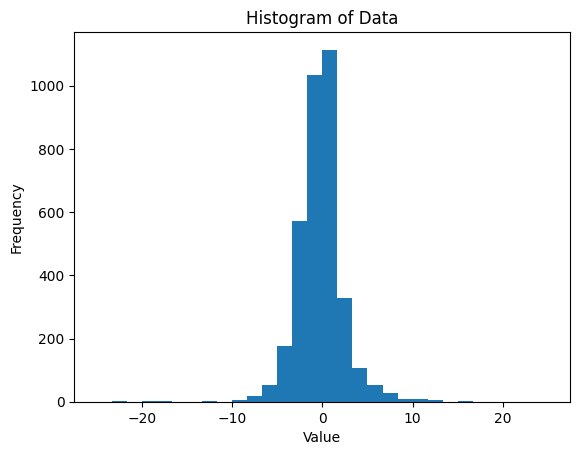

In [ ]:
df_ABBANK = df_new_filtered_short[(df_new_filtered['trading_code'] == 'ABBANK')]
plt.hist(df_ABBANK['change'], bins=30, range=(-25, 25))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# plt.hist(df_ABBANK['change'])

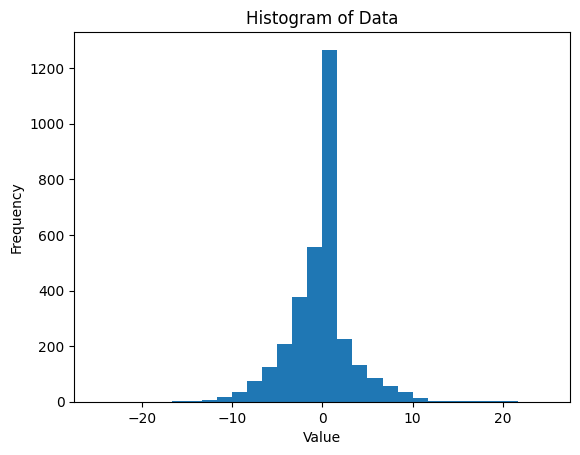

In [ ]:
df_ZEALBANGLA = df_new_filtered_short[(df_new_filtered['trading_code'] == 'ZEALBANGLA')]
plt.hist(df_ZEALBANGLA['change'], bins=30, range=(-25, 25))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
df_StockData_categorized = pd.read_csv(io.BytesIO(uploaded['StockData.csv']))

df_StockData_categorized.head()

Saving StockData.csv to StockData.csv


,CompanyName,Sector,Category,Last Price,NAV,P/E,EPS,Paid up,Dir,Pub,Inst,Foreign,Govt
0,NBL,Bank,A,7.8,16.92,6.61,1.18,30664.20,30.98,47.14,20.73,1.15,0.00
1,NRBCBANK,Bank,N,27.7,16.88,11.69,2.37,0.00,73.32,23.22,3.46,0.00,0.00
2,ABBANK,Bank,B,13.9,32.26,27.80,0.50,7960.37,31.67,41.43,25.44,0.89,0.57
3,IFIC,Bank,A,13.1,17.18,18.71,0.70,16198.70,4.11,39.55,22.87,0.72,32.75
4,RUPALIBANK,Bank,A,31.9,44.10,65.10,0.49,4141.69,0.00,4.98,4.83,0.00,90.19


In [ ]:
df_StockData_categorized.groupby("CompanyName").count()

,Sector,Category,Last Price,NAV,P/E,EPS,Paid up,Dir,Pub,Inst,Foreign,Govt
CompanyName,,,,,,,,,,,,
1JANATAMF,1,1,1,1,1,1,1,1,1,1,1,1
1STPRIMFMF,1,1,1,1,1,1,1,1,1,1,1,1
AAMRANET,1,1,1,1,1,1,1,1,1,1,1,1
AAMRATECH,1,1,1,1,1,1,1,1,1,1,1,1
ABB1STMF,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
WMSHIPYARD,1,1,1,1,1,1,1,1,1,1,1,1
YPL,1,1,1,1,1,1,1,1,1,1,1,1
ZAHEENSPIN,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_StockData_categorized.groupby("Category").count()

,CompanyName,Sector,Last Price,NAV,P/E,EPS,Paid up,Dir,Pub,Inst,Foreign,Govt
Category,,,,,,,,,,,,
A,270,270,270,267,270,270,270,270,270,270,270,270
B,60,60,60,60,60,60,60,60,60,60,60,60
N,13,13,13,13,13,13,13,13,13,13,13,13
Z,31,31,31,31,31,31,31,31,31,31,31,31


In [ ]:
df_filtered

,trading_code,start_date,end_date
trading_code,,,
1JANATAMF,1JANATAMF,2010-09-20,2022-12-29
1STPRIMFMF,1STPRIMFMF,2009-03-17,2022-12-29
AAMRANET,AAMRANET,2017-10-02,2022-12-29
AAMRATECH,AAMRATECH,2012-07-04,2022-12-29
ABB1STMF,ABB1STMF,2012-01-29,2022-12-29
...,...,...,...
WMSHIPYARD,WMSHIPYARD,2014-11-02,2022-12-29
YPL,YPL,2016-09-22,2022-12-29
ZAHEENSPIN,ZAHEENSPIN,2015-03-25,2022-12-29


In [ ]:
df_filtered.to_csv('companies_2008_2022.csv', encoding = 'utf-8-sig')
files.download('companies_2008_2022.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)[source]

sample_1=df_filtered.sample(n=150, random_state=1)
sample_2=df_filtered.sample(n=150, random_state=2)
sample_3=df_filtered.sample(n=150, random_state=3)


In [ ]:
sample_1

,trading_code,start_date,end_date
trading_code,,,
SONALIPAPR,SONALIPAPR,2008-03-06,2022-12-29
LOVELLO,LOVELLO,2021-09-13,2022-12-29
CITYBANK,CITYBANK,2008-03-06,2022-12-29
STANDBANKL,STANDBANKL,2008-03-06,2022-12-29
REPUBLIC,REPUBLIC,2009-01-18,2022-12-29
...,...,...,...
BATBC,BATBC,2008-03-06,2022-12-29
T20Y1130,T20Y1130,2011-01-17,2021-12-23
EASTRNLUB,EASTRNLUB,2008-03-06,2022-12-29


In [ ]:
sample_3

,trading_code,start_date,end_date
trading_code,,,
T10Y0216,T10Y0216,2008-03-06,2021-12-23
CITYGENINS,CITYGENINS,2008-03-06,2022-12-29
ISNLTD,ISNLTD,2008-03-06,2022-12-29
T20Y0930,T20Y0930,2011-01-17,2021-12-23
TB15Y0824,TB15Y0824,2022-10-10,2022-12-29
...,...,...,...
T20Y0931,T20Y0931,2011-10-16,2021-12-23
T10Y0521,T10Y0521,2011-07-27,2021-12-23
TB15Y1125,TB15Y1125,2022-10-10,2022-12-29


In [ ]:
df_sample_1 = df_new_filtered[df_new_filtered['trading_code'].isin(sample_1['trading_code'])]
df_sample_1


df_sample_2 = df_new_filtered[df_new_filtered['trading_code'].isin(sample_2['trading_code'])]
df_sample_2


df_sample_3 = df_new_filtered[df_new_filtered['trading_code'].isin(sample_3['trading_code'])]
df_sample_3

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,Date
4291,4291,2008-12-30,AMCL(PRAN),1032.25,1038.0,994.0,994.0,1013.75,1019.75,128,2.3443,2290,2008-12-30
4292,4292,2008-12-28,AMCL(PRAN),1030.00,1030.0,1000.0,1000.0,1019.75,1011.00,73,1.2555,1230,2008-12-28
4293,4293,2008-12-24,AMCL(PRAN),1005.00,1090.0,991.0,1048.0,1011.00,1027.00,305,6.1365,5890,2008-12-24
4294,4294,2008-12-23,AMCL(PRAN),1027.00,1027.0,895.5,925.0,1027.00,902.00,395,7.1528,7370,2008-12-23
4295,4295,2008-12-22,AMCL(PRAN),900.00,909.0,890.0,895.5,902.00,896.50,70,1.2205,1360,2008-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790576,112221,2022-01-06,ZAHEENSPIN,9.00,9.4,9.0,9.4,9.00,9.30,102,2.3060,248648,2022-01-06
1790577,112222,2022-01-05,ZAHEENSPIN,9.30,9.4,9.1,9.4,9.30,9.40,123,1.2870,139110,2022-01-05
1790578,112223,2022-01-04,ZAHEENSPIN,9.40,9.4,9.0,9.0,9.40,9.00,257,4.9850,539145,2022-01-04
1790579,112224,2022-01-03,ZAHEENSPIN,9.00,9.2,8.9,8.9,9.00,8.80,182,3.3940,375312,2022-01-03


In [ ]:
df_sample_1.to_csv('sample_1.csv', encoding = 'utf-8-sig')
files.download('sample_1.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_sample_2.to_csv('sample_2.csv', encoding = 'utf-8-sig')
files.download('sample_2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

df_sample_3.to_csv('sample_3.csv', encoding = 'utf-8-sig')
files.download('sample_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:



sample_4=df_StockData_categorized.sample(n=150, random_state=4)

df_sample_4 = df_new_filtered[df_new_filtered['trading_code'].isin(sample_4['CompanyName'])]
df_sample_4


df_sample_4.to_csv('sample_4.csv', encoding = 'utf-8-sig')
files.download('sample_4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sample_4

,CompanyName,Sector,Category,Last Price,NAV,P/E,EPS,Paid up,Dir,Pub,Inst,Foreign,Govt
172,SONARBAINS,Insurance,A,83.6,19.62,40.00,2.09,400.41,36.78,45.21,18.01,0.00,0.0
319,MAKSONSPIN,Textile,B,19.6,0.79,-52.97,-0.37,2382.33,30.00,52.31,17.69,0.00,0.0
336,MALEKSPIN,Textile,A,28.9,1.74,-17.20,-1.68,1936.00,47.34,19.60,33.06,0.00,0.0
14,NCCBANK,Bank,A,14.7,22.15,6.23,2.36,9459.26,37.58,40.79,21.08,0.55,0.0
202,MERCINS,Insurance,B,53.5,19.05,31.85,1.68,430.95,32.85,40.84,26.31,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,RELIANCINS,Insurance,A,102.1,60.73,19.60,5.21,1051.61,65.20,31.44,3.36,0.00,0.0
353,ANLIMAYARN,Textile,B,38.7,10.69,276.43,0.14,178.68,47.22,43.29,9.49,0.00,0.0
351,NEWLINE,Textile,A,28.7,23.83,25.18,1.14,785.33,30.80,55.12,14.06,0.00,0.0
157,ADNTEL,IT Sector,A,52.5,25.27,18.36,2.86,646.52,51.56,22.70,23.75,1.99,0.0


In [ ]:
df_sample_4

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,Date
1940,1940,2008-12-30,ACI,519.0,538.0,514.0,521.0,521.3,528.6,1205,119.4100,229250,2008-12-30
1941,1941,2008-12-28,ACI,528.0,537.9,516.5,527.0,528.6,502.1,1214,91.9733,173700,2008-12-28
1942,1942,2008-12-24,ACI,524.9,525.0,480.0,485.9,502.1,481.5,1570,166.5134,334500,2008-12-24
1943,1943,2008-12-23,ACI,480.0,490.0,477.6,477.6,481.5,479.6,376,23.9691,49450,2008-12-23
1944,1944,2008-12-22,ACI,477.2,489.0,477.1,481.0,479.6,482.9,525,36.4681,75650,2008-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791064,112709,2022-01-06,ZEALBANGLA,123.4,123.4,119.0,119.0,119.5,120.4,29,0.1730,1445,2022-01-06
1791065,112710,2022-01-05,ZEALBANGLA,118.0,124.9,118.0,124.9,120.4,123.8,38,0.3800,3105,2022-01-05
1791066,112711,2022-01-04,ZEALBANGLA,123.8,123.8,120.0,120.2,123.8,122.0,39,0.3640,2954,2022-01-04
1791067,112712,2022-01-03,ZEALBANGLA,120.0,128.0,117.6,117.6,122.0,117.0,81,0.8170,6681,2022-01-03


In [ ]:
# grouped_df_sample_4= df_sample_4.groupby('trading_code')
df_sample_4.groupby("trading_code").count()

,Unnamed: 0,date,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,Date
trading_code,,,,,,,,,,,,
1STPRIMFMF,3286,3286,3286,3286,3286,3286,3286,3286,3286,3286,3286,3286
AAMRANET,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234
ABB1STMF,2599,2599,2599,2599,2599,2599,2599,2599,2599,2599,2599,2599
ACFL,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
ACI,3531,3531,3531,3531,3531,3531,3531,3531,3531,3531,3531,3531
...,...,...,...,...,...,...,...,...,...,...,...,...
UTTARAFIN,3529,3529,3529,3529,3529,3529,3529,3529,3529,3529,3529,3529
WALTONHIL,553,553,553,553,553,553,553,553,553,553,553,553
WMSHIPYARD,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944
